<a href="https://colab.research.google.com/github/Theparamvrsingh/Being-Notified/blob/main/Lab1AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the requried libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Load the dataset

In [2]:
# Load Dataset
url = "https://www.statlearning.com/s/Advertising.csv"
df = pd.read_csv(url)

# Display the first few rows
print("Dataset Preview:")
print(df.head())


Dataset Preview:
   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


Explore the dataset

In [3]:
# Dataset Shape
print("Dataset Shape:", df.shape)

# Statistical Summary
print("Statistical Summary:")
print(df.describe())


Dataset Shape: (200, 5)
Statistical Summary:
       Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


Data Preparation,Separating into training and testing data

In [7]:
 # Separate Features and Target
X = df[['TV', 'radio', 'newspaper']]  # Features
Y = df['sales']  # Target

# Print the shapes
print("Features Shape:", X.shape)
print("Target Shape:", Y.shape)

# Split the Dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Confirm the split
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)


Features Shape: (200, 3)
Target Shape: (200,)
Training Features Shape: (140, 3)
Testing Features Shape: (60, 3)


Training a liner regression model and its performance matrix

In [8]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

# Predict on Test Data
Y_pred_linear = lin_reg.predict(X_test)

# Performance Metrics for Linear Regression
print("Linear Regression Performance:")
print("MSE:", mean_squared_error(Y_test, Y_pred_linear))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_linear)))
print("MAE:", mean_absolute_error(Y_test, Y_pred_linear))
print("R2 Score:", r2_score(Y_test, Y_pred_linear))


Linear Regression Performance:
MSE: 3.79679723671522
RMSE: 1.9485372043446387
MAE: 1.5116692224549086
R2 Score: 0.8609466508230368


Polynomial Regression Implementation

In [9]:
# Polynomial Regression
degrees = [2, 3, 4]

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, Y_train)
    Y_pred_poly = poly_reg.predict(X_test_poly)

    print(f"\nPolynomial Regression (Degree {degree}) Performance:")
    print("MSE:", mean_squared_error(Y_test, Y_pred_poly))
    print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_poly)))
    print("MAE:", mean_absolute_error(Y_test, Y_pred_poly))
    print("R2 Score:", r2_score(Y_test, Y_pred_poly))



Polynomial Regression (Degree 2) Performance:
MSE: 0.5231944949055658
RMSE: 0.7233218473857719
MAE: 0.5905974833808363
R2 Score: 0.9808386009966364

Polynomial Regression (Degree 3) Performance:
MSE: 0.29077449153131163
RMSE: 0.5392350985714038
MAE: 0.3972831213348909
R2 Score: 0.9893507173594454

Polynomial Regression (Degree 4) Performance:
MSE: 1.6983995238764573
RMSE: 1.303226581940553
MAE: 0.6056652141356343
R2 Score: 0.9377980631275689


Visualization of the results of linear and polynomial regression models

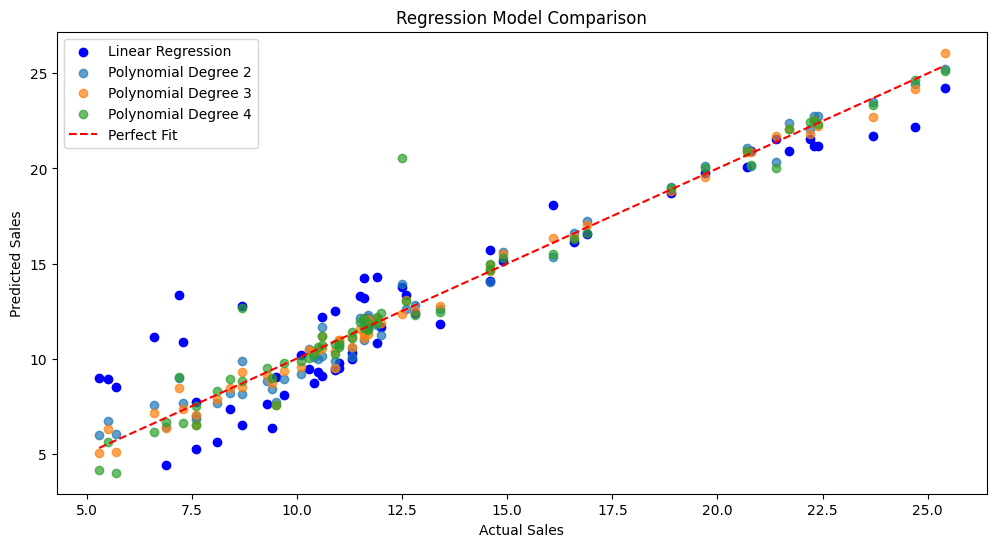

In [10]:
# Scatter Plot for Linear Regression
plt.figure(figsize=(12, 6))
plt.scatter(Y_test, Y_pred_linear, color='blue', label='Linear Regression')

# Scatter Plots for Polynomial Regression
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_test_poly = poly.fit_transform(X_test)
    Y_pred_poly = LinearRegression().fit(poly.fit_transform(X_train), Y_train).predict(X_test_poly)
    plt.scatter(Y_test, Y_pred_poly, alpha=0.7, label=f'Polynomial Degree {degree}')

# Perfect Fit Line
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.title('Regression Model Comparison')
plt.show()
